In [1]:
import numpy as np 
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE 
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.path.join("D:/aminur/chest_lung_seg/108201_258315_bundle_archive/Lung Segmentation/CXR_png")
mask_path = os.path.join("D:/aminur/chest_lung_seg/108201_258315_bundle_archive/Lung Segmentation/","masks/")

In [2]:
# we have 704 masks but 800 images. Hence we are going to
# make a 1-1 correspondance from mask to images, not the usual other way.
images = os.listdir(image_path)
mask = os.listdir(mask_path)
mask = [fName.split(".png")[0] for fName in mask]
image_file_name = [fName.split("_mask")[0] for fName in mask]

In [3]:
check = [i for i in mask if "mask" in i]
print("Total mask that has modified name:",len(check))

Total mask that has modified name: 566


In [4]:
testing_files = set(os.listdir(image_path)) & set(os.listdir(mask_path))
training_files = check

def getData(X_shape, flag = "test"):
    im_array = []
    mask_array = []
    
    if flag == "test":
        for i in tqdm(testing_files): 
            im = cv2.resize(cv2.imread(os.path.join(image_path,i)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i)),(X_shape,X_shape))[:,:,0]
            
            im_array.append(im)
            mask_array.append(mask)
        
        return im_array,mask_array
    
    if flag == "train":
        for i in tqdm(training_files): 
            im = cv2.resize(cv2.imread(os.path.join(image_path,i.split("_mask")[0]+".png")),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i+".png")),(X_shape,X_shape))[:,:,0]
            im_array.append(im)
            mask_array.append(mask)

        return im_array,mask_array

In [5]:

def plotMask(X,y):
    sample = []
    
    for i in range(6):
        left = X[i]
        right = y[i]
        combined = np.hstack((left,right))
        sample.append(combined)
        
        
    for i in range(0,6,3):

        plt.figure(figsize=(25,10))
        
        plt.subplot(2,3,1+i)
        plt.imshow(sample[i])
        
        plt.subplot(2,3,2+i)
        plt.imshow(sample[i+1])
        
        
        plt.subplot(2,3,3+i)
        plt.imshow(sample[i+2])
        
        plt.show()

In [6]:
# Load training and testing data
dim = 256
X_train,y_train = getData(dim,flag="train")
X_test, y_test = getData(dim)

100%|████████████████████████████████████████████████████████████████████████████████| 138/138 [00:40<00:00,  3.44it/s]


training set


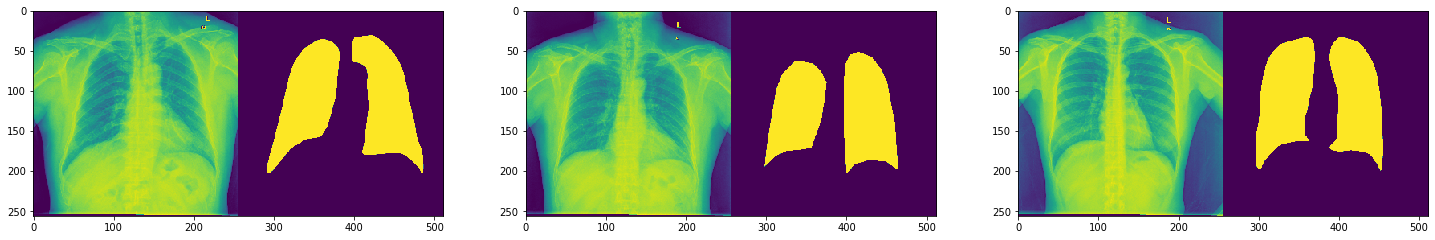

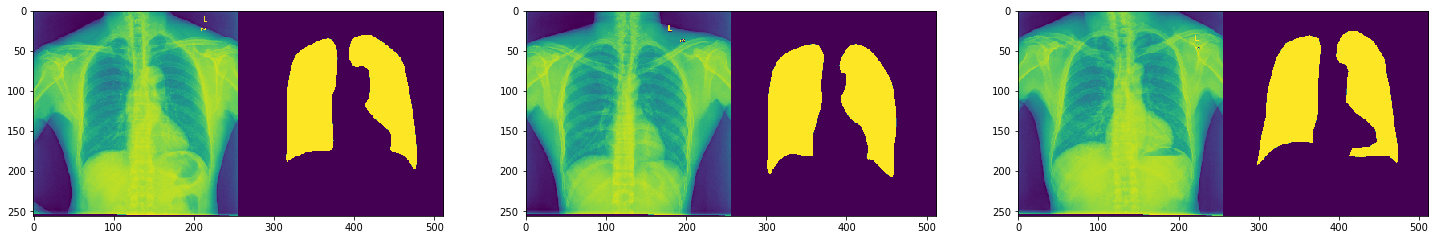

testing set


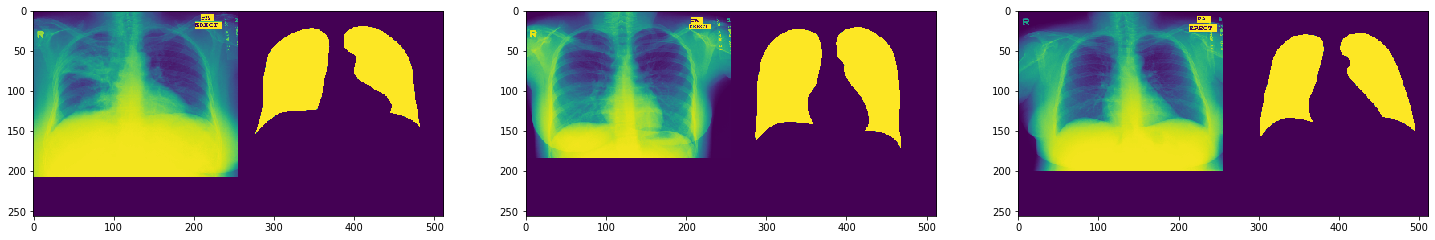

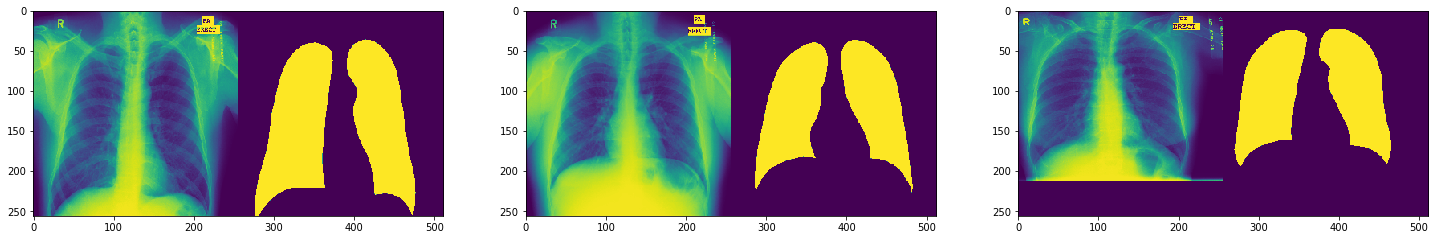

In [7]:
print("training set")
plotMask(X_train,y_train)
print("testing set")
plotMask(X_test,y_test)

In [8]:
X_train = np.array(X_train).reshape(len(X_train),dim,dim,1)
y_train = np.array(y_train).reshape(len(y_train),dim,dim,1)
X_test = np.array(X_test).reshape(len(X_test),dim,dim,1)
y_test = np.array(y_test).reshape(len(y_test),dim,dim,1)
assert X_train.shape == y_train.shape
assert X_test.shape == y_test.shape
images = np.concatenate((X_train,X_test),axis=0)
mask  = np.concatenate((y_train,y_test),axis=0)
np.save('D:/aminur/unet_lung/images.npy',images)
np.save('D:/aminur/unet_lung/mask.npy',mask)
'''
x=np.load('D:/aminur/unet_lung/img.npy')
y=np.load('D:/aminur/unet_lung/mask.npy')
images = np.concatenate((images,x),axis=0)
mask  = np.concatenate((mask,y),axis=0)'''
print(images.shape,mask.shape)

(704, 256, 256, 1) (704, 256, 256, 1)


In [9]:

'''image_path_1 = os.path.join("D:/aminur/chest_lung_seg/image")
mask_path_1 = os.path.join("D:/aminur/chest_lung_seg/","masks/")

testing_files = set(os.listdir(image_path)) & set(os.listdir(mask_path))
training_files = check
def getData(X_shape, flag = "train"):
    im_array = []
    mask_array = []
    
    if flag == "train":
        for i in tqdm(testing_files): 
            im = cv2.resize(cv2.imread(os.path.join(image_path_1,i)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path_1,i)),(X_shape,X_shape))[:,:,0]
            
            im_array.append(im)
            mask_array.append(mask)
        
        return im_array,mask_array
    
    
dim = 256
X_train_1,y_train_1 = getData(dim,flag="train")
X = np.array(X_train_1).reshape(len(X_train_1),dim,dim,1)
y = np.array(y_train_1).reshape(len(y_train_1),dim,dim,1)
assert X.shape == y.shape
images = np.concatenate((images,X),axis=0)
mask  = np.concatenate((mask,y),axis=0)
np.save('D:/aminur/unet_lung/images.npy',images)
np.save('D:/aminur/unet_lung/mask.npy',mask)
print(images.shape,mask.shape)'''

'image_path_1 = os.path.join("D:/aminur/chest_lung_seg/image")\nmask_path_1 = os.path.join("D:/aminur/chest_lung_seg/","masks/")\n\ntesting_files = set(os.listdir(image_path)) & set(os.listdir(mask_path))\ntraining_files = check\ndef getData(X_shape, flag = "train"):\n    im_array = []\n    mask_array = []\n    \n    if flag == "train":\n        for i in tqdm(testing_files): \n            im = cv2.resize(cv2.imread(os.path.join(image_path_1,i)),(X_shape,X_shape))[:,:,0]\n            mask = cv2.resize(cv2.imread(os.path.join(mask_path_1,i)),(X_shape,X_shape))[:,:,0]\n            \n            im_array.append(im)\n            mask_array.append(mask)\n        \n        return im_array,mask_array\n    \n    \ndim = 256\nX_train_1,y_train_1 = getData(dim,flag="train")\nX = np.array(X_train_1).reshape(len(X_train_1),dim,dim,1)\ny = np.array(y_train_1).reshape(len(y_train_1),dim,dim,1)\nassert X.shape == y.shape\nimages = np.concatenate((images,X),axis=0)\nmask  = np.concatenate((mask,y),axis

In [10]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
def unet(input_size=(256,256,1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    
    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

Using TensorFlow backend.


In [11]:
model = unet(input_size=(256,256,1))
#lr=1e-5
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [12]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('cxr_reg')

checkpoint = ModelCheckpoint('model_Unet_Xray.h5', monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=5, 
                                   verbose=1, mode='min', epsilon=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint,early, reduceLROnPlat]

D:\Anaconda3\envs\deep\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [13]:
from IPython.display import clear_output
from keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
#lr=2e-4
model.compile(optimizer=Adam(lr=1e-5), 
              loss=[dice_coef_loss], 
           metrics = [dice_coef, 'binary_accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((images-127.0)/127.0, 
                                                            (mask>127).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

#train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
 #                                                           test_size = 0.1, 
  #                                                          random_state = 2018)

loss_history = model.fit(x = train_vol,
                       y = train_seg,
                         batch_size = 8,
                  epochs = 400,
                  validation_data =(validation_vol,validation_seg) ,
                  callbacks=callbacks_list)


#clear_output()

Train on 633 samples, validate on 71 samples
Epoch 1/400
633/633 [==============================] - 16s 25ms/step - loss: -0.3364 - dice_coef: 0.3374 - binary_accuracy: 0.4951 - val_loss: -0.3373 - val_dice_coef: 0.3371 - val_binary_accuracy: 0.6527

Epoch 00001: val_loss improved from inf to -0.33726, saving model to model_Unet_Xray.h5
Epoch 2/400
633/633 [==============================] - 11s 17ms/step - loss: -0.3408 - dice_coef: 0.3412 - binary_accuracy: 0.6548 - val_loss: -0.3468 - val_dice_coef: 0.3467 - val_binary_accuracy: 0.6408

Epoch 00002: val_loss improved from -0.33726 to -0.34683, saving model to model_Unet_Xray.h5
Epoch 3/400
633/633 [==============================] - 11s 17ms/step - loss: -0.4561 - dice_coef: 0.4588 - binary_accuracy: 0.6031 - val_loss: -0.6270 - val_dice_coef: 0.6269 - val_binary_accuracy: 0.8739

Epoch 00003: val_loss improved from -0.34683 to -0.62702, saving model to model_Unet_Xray.h5
Epoch 4/400
633/633 [==============================] - 11s 18ms


Epoch 00029: val_loss did not improve from -0.92980
Epoch 30/400
633/633 [==============================] - 11s 17ms/step - loss: -0.9284 - dice_coef: 0.9287 - binary_accuracy: 0.9645 - val_loss: -0.9305 - val_dice_coef: 0.9306 - val_binary_accuracy: 0.9662

Epoch 00030: val_loss improved from -0.92980 to -0.93046, saving model to model_Unet_Xray.h5
Epoch 31/400
633/633 [==============================] - 11s 17ms/step - loss: -0.9330 - dice_coef: 0.9325 - binary_accuracy: 0.9668 - val_loss: -0.9303 - val_dice_coef: 0.9304 - val_binary_accuracy: 0.9662

Epoch 00031: val_loss did not improve from -0.93046
Epoch 32/400
633/633 [==============================] - 11s 18ms/step - loss: -0.9328 - dice_coef: 0.9330 - binary_accuracy: 0.9666 - val_loss: -0.9342 - val_dice_coef: 0.9343 - val_binary_accuracy: 0.9673

Epoch 00032: val_loss improved from -0.93046 to -0.93420, saving model to model_Unet_Xray.h5
Epoch 33/400
633/633 [==============================] - 11s 17ms/step - loss: -0.9348 - 

633/633 [==============================] - 13s 20ms/step - loss: -0.9548 - dice_coef: 0.9550 - binary_accuracy: 0.9775 - val_loss: -0.9507 - val_dice_coef: 0.9507 - val_binary_accuracy: 0.9753

Epoch 00089: val_loss improved from -0.95050 to -0.95067, saving model to model_Unet_Xray.h5
Epoch 90/400
633/633 [==============================] - 12s 19ms/step - loss: -0.9544 - dice_coef: 0.9544 - binary_accuracy: 0.9772 - val_loss: -0.9481 - val_dice_coef: 0.9482 - val_binary_accuracy: 0.9748

Epoch 00090: val_loss did not improve from -0.95067
Epoch 91/400
633/633 [==============================] - 12s 18ms/step - loss: -0.9543 - dice_coef: 0.9543 - binary_accuracy: 0.9773 - val_loss: -0.9514 - val_dice_coef: 0.9515 - val_binary_accuracy: 0.9760

Epoch 00091: val_loss improved from -0.95067 to -0.95139, saving model to model_Unet_Xray.h5
Epoch 92/400
633/633 [==============================] - 11s 18ms/step - loss: -0.9549 - dice_coef: 0.9549 - binary_accuracy: 0.9776 - val_loss: -0.9518 - 


Epoch 00118: val_loss improved from -0.95251 to -0.95257, saving model to model_Unet_Xray.h5
Epoch 119/400
633/633 [==============================] - 11s 18ms/step - loss: -0.9572 - dice_coef: 0.9573 - binary_accuracy: 0.9787 - val_loss: -0.9524 - val_dice_coef: 0.9524 - val_binary_accuracy: 0.9763

Epoch 00119: val_loss did not improve from -0.95257
Epoch 120/400
633/633 [==============================] - 12s 18ms/step - loss: -0.9572 - dice_coef: 0.9573 - binary_accuracy: 0.9787 - val_loss: -0.9527 - val_dice_coef: 0.9527 - val_binary_accuracy: 0.9766

Epoch 00120: val_loss improved from -0.95257 to -0.95266, saving model to model_Unet_Xray.h5
Epoch 121/400
633/633 [==============================] - 11s 18ms/step - loss: -0.9571 - dice_coef: 0.9562 - binary_accuracy: 0.9787 - val_loss: -0.9526 - val_dice_coef: 0.9526 - val_binary_accuracy: 0.9764

Epoch 00121: val_loss did not improve from -0.95266
Epoch 122/400
633/633 [==============================] - 13s 20ms/step - loss: -0.957


Epoch 00179: val_loss did not improve from -0.95339
Epoch 180/400
633/633 [==============================] - 11s 18ms/step - loss: -0.9586 - dice_coef: 0.9579 - binary_accuracy: 0.9794 - val_loss: -0.9535 - val_dice_coef: 0.9536 - val_binary_accuracy: 0.9769

Epoch 00180: val_loss improved from -0.95339 to -0.95350, saving model to model_Unet_Xray.h5
Epoch 181/400
633/633 [==============================] - 11s 18ms/step - loss: -0.9587 - dice_coef: 0.9587 - binary_accuracy: 0.9794 - val_loss: -0.9535 - val_dice_coef: 0.9536 - val_binary_accuracy: 0.9769

Epoch 00181: val_loss did not improve from -0.95350
Epoch 182/400
633/633 [==============================] - 11s 18ms/step - loss: -0.9587 - dice_coef: 0.9587 - binary_accuracy: 0.9794 - val_loss: -0.9533 - val_dice_coef: 0.9534 - val_binary_accuracy: 0.9768

Epoch 00182: val_loss did not improve from -0.95350
Epoch 183/400
633/633 [==============================] - 11s 17ms/step - loss: -0.9585 - dice_coef: 0.9582 - binary_accuracy: 

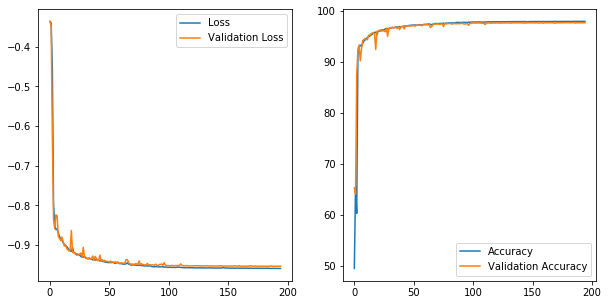

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['binary_accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_binary_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

71/71 [==============================] - 1s 10ms/step


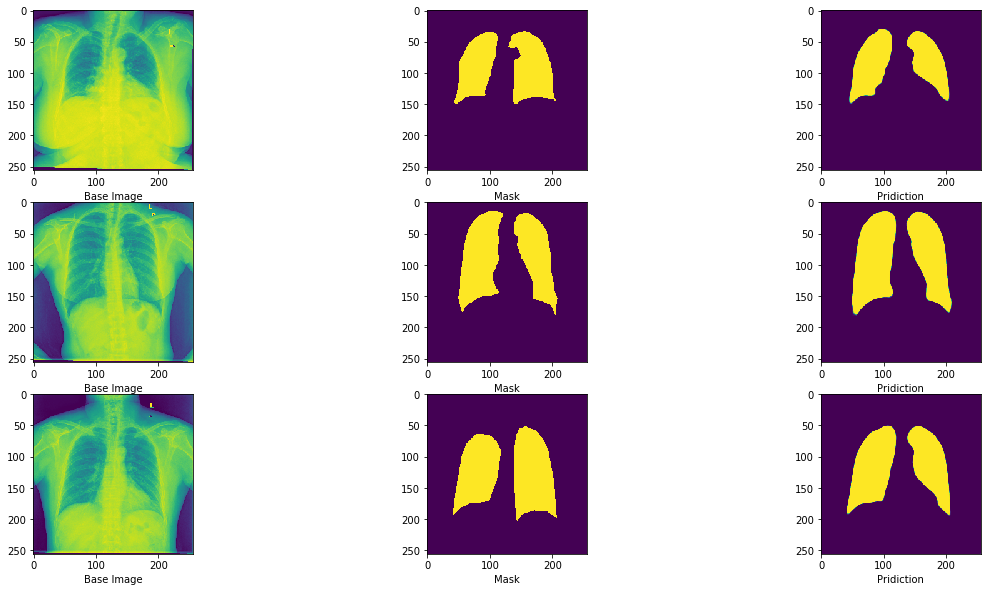

In [15]:

pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol,batch_size=1,verbose=1)

plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

In [16]:
model.load_weights('model_Unet_Xray.h5')
print (validation_vol.shape,type(validation_vol))

(71, 256, 256, 1) <class 'numpy.ndarray'>


max X:  255.0
min X:  0.0
1018/1018 [==============================] - 9s 9ms/step


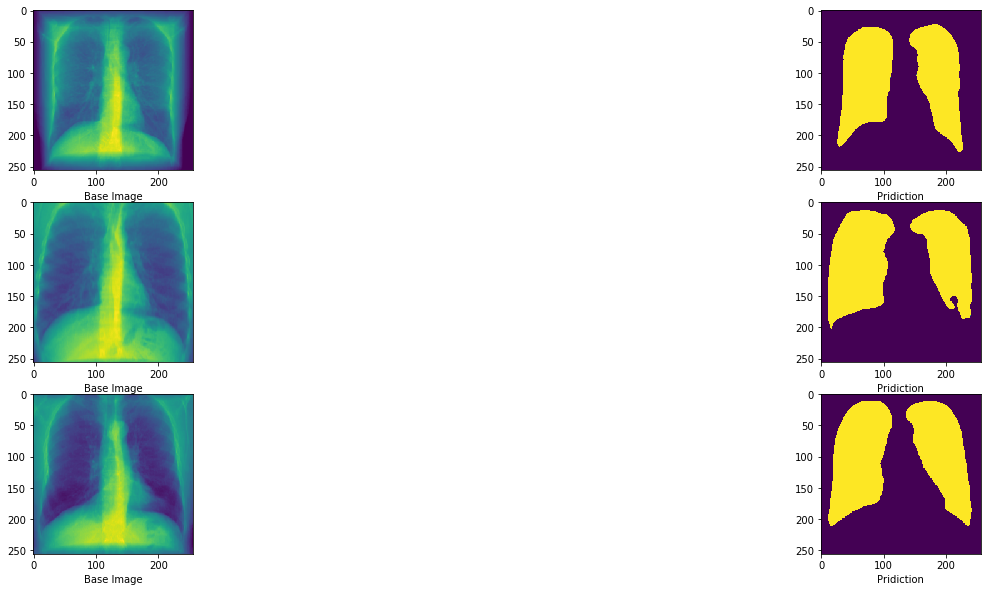

In [19]:
X=np.load('D:/aminur/data/X2CT.npy')
max_value = float(X.max())
print("max X: ",max_value)
print("min X: ", X.min())
pred_candidates = np.random.randint(1,X.shape[0],10)
preds = model.predict(X,batch_size=1,verbose=1)
np.save('D:/aminur/unet_lung/result_X2CT1_(1e-5).npy',preds)

plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(X[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

In [ ]:
x=np.load("D:/aminur/unet_lung/result_lung_all_(1e-5).npy)